# REGRESSION - ANALYSIS WITH XGB
raulvalerio@gmail.com

#### Regresion XGBoost Ajuste de hiperparametros GridSearchCV: https://youtu.be/CwhotsJW2PU

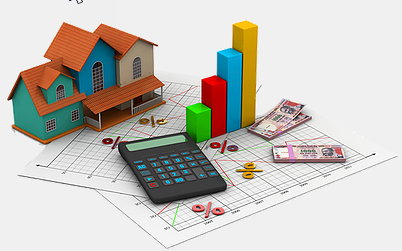

Photo Source: www.medium.com

## Real Estate valuation

Attribute Information:

* X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* X2=the house age (unit: year)
* X3=the distance to the nearest MRT station (unit: meter)
* X4=the number of convenience stores in the living circle on foot (integer)
* X5=the geographic coordinate, latitude. (unit: degree)
* X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow

* Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

Source: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [2]:
data= pd.read_csv("mydatasets/Real estate valuation data set.csv")

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.shape

(414, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


###  Choosing features :  Feature Selection

In [7]:
data=data.drop(['X1 transaction date','No'],axis=1)

In [8]:
data.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [9]:
data.columns = ['House Age','Distance to MRT','Number Stores','Latitude','Longitude','House Price Unit']

In [10]:
data.head()

,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
data['Number Stores'] = data['Number Stores'].astype('float')

In [12]:
data.head()

,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit
0,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,5.0,390.56840,5.0,24.97937,121.54245,43.1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   House Age         414 non-null    float64
 1   Distance to MRT   414 non-null    float64
 2   Number Stores     414 non-null    float64
 3   Latitude          414 non-null    float64
 4   Longitude         414 non-null    float64
 5   House Price Unit  414 non-null    float64
dtypes: float64(6)
memory usage: 19.5 KB


### Null variables and missing values

In [14]:
data.isna().sum()

House Age           0
Distance to MRT     0
Number Stores       0
Latitude            0
Longitude           0
House Price Unit    0
dtype: int64

### Select output and input variables

In [15]:
X = data.drop('House Price Unit',axis=1)
y = data['House Price Unit']

### Split train and test

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1) # 75 - 25 split   (test_size=0.25)

In [17]:
X_train.shape, X_test.shape

((310, 5), (104, 5))

In [18]:
data_train = X_train
data_train['House Price Unit'] = y_train
data_train.head()

C:\Users\raulv\AppData\Local\Temp/ipykernel_15780/744740879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['House Price Unit'] = y_train


,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit
368,18.2,350.8515,1.0,24.97544,121.53119,43.1
218,13.6,492.2313,5.0,24.96515,121.53737,43.8
127,3.8,383.8624,5.0,24.98085,121.54391,55.0
351,4.0,2180.2450,3.0,24.96324,121.51241,28.6
173,41.3,401.8807,4.0,24.98326,121.54460,35.1


In [19]:
data_test = X_test
data_test['House Price Unit'] = y_test
data_test.head()

C:\Users\raulv\AppData\Local\Temp/ipykernel_15780/1884304465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['House Price Unit'] = y_test


,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit
388,10.4,2251.9380,4.0,24.95957,121.51353,27.3
102,1.1,193.5845,6.0,24.96571,121.54089,54.4
187,8.9,3078.1760,0.0,24.95464,121.56627,22.0
162,16.0,4066.5870,0.0,24.94297,121.50342,11.6
90,0.0,274.0144,1.0,24.97480,121.53059,45.4


### Chossing Regressor

In [20]:
model = XGBRegressor()

### Fitting model

In [21]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

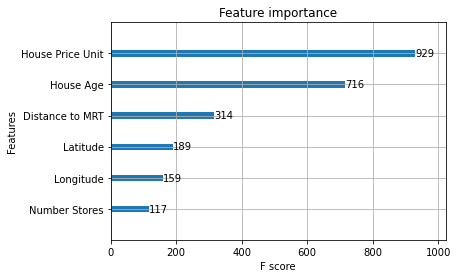

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(model, ax=plt.gca())

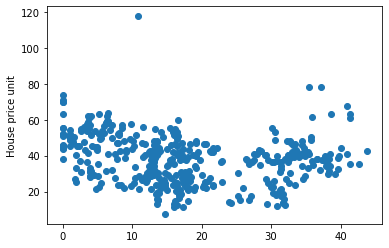

In [23]:
plt.scatter(data["House Age"], data["House Price Unit"])
plt.ylabel("House price unit")
plt.show()

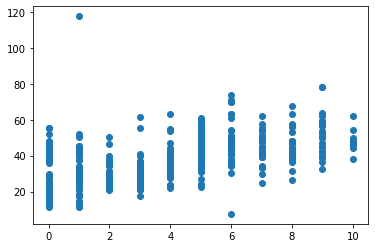

In [24]:
plt.scatter(data["Number Stores"], data["House Price Unit"])
plt.show()

### Predicting new values

In [25]:
predictions = model.predict(X_test)

In [26]:
predictions[0:10]

array([27.143843, 54.82799 , 22.017744, 11.182391, 45.415333, 23.33272 ,
       21.915741, 32.294876, 37.26874 , 22.530434], dtype=float32)

In [27]:
X_test.iloc[0]

House Age             10.40000
Distance to MRT     2251.93800
Number Stores          4.00000
Latitude              24.95957
Longitude            121.51353
House Price Unit      27.30000
Name: 388, dtype: float64

In [28]:
y_test.iloc[0]

27.3

## Model Error

#### Training MSE

In [29]:
pred_train = model.predict(X_train)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE

In [31]:
print( r2_score(y_train, pred_train) ) # how much variance the model explains?

0.9999994755344443


In [32]:
print( mean_squared_error(y_train, pred_train) )  ##  lower -> better ?? 

9.784561019841738e-05


#### Testing MSE

In [33]:
model.score(X_test, y_test)  ## R^2

0.9986913601256525

In [34]:
print(r2_score(y_test, predictions))

0.9986913601256525


In [35]:
print(mean_squared_error(y_test, predictions))

0.2310650278048099


### What to do ??

* Remove outliers from House Price Unit
* Add dates as year and month, day maybe?
* Change train - test split size   (test_size=0.33)
* Optimize hyperparameters
* Run Cross validation

## SECOND PART

In [36]:
data= pd.read_csv("mydatasets/Real estate valuation data set.csv")

In [37]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [38]:
data=data.drop(['No'],axis=1)

In [39]:
data.columns = ['Date','House Age','Distance to MRT','Number Stores','Latitude','Longitude','House Price Unit']

### FEATURE ENGINEERING

In [40]:
type(data.Date[0])

numpy.float64

In [41]:
from datetime import datetime

data['date_time'] =  pd.to_datetime(data['Date'], format='%Y')

data['year'] = pd.DatetimeIndex(data['date_time']).year

data.head()

,Date,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,date_time,year
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012


In [42]:
import math
data['month'],data['year2'] =  data['Date'].apply(lambda x: math.modf(x)).str

C:\Users\raulv\AppData\Local\Temp/ipykernel_15780/1388950746.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['month'],data['year2'] =  data['Date'].apply(lambda x: math.modf(x)).str


In [43]:
data.head()

,Date,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,date_time,year,month,year2
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,0.917,2012.0
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,0.917,2012.0
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,0.583,2013.0
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,0.500,2013.0
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,0.833,2012.0


In [44]:
data['year2'] = ( data['year2']).astype(int)

In [45]:
data['month'] = data['month']*12

In [46]:
data.head()

,Date,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,date_time,year,month,year2
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11.004,2012
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11.004,2012
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,6.996,2013
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6.000,2013
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,9.996,2012


In [47]:
data['day'],data['month'] =  data['month'].apply(lambda x: math.modf(x)).str

C:\Users\raulv\AppData\Local\Temp/ipykernel_15780/999644250.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['day'],data['month'] =  data['month'].apply(lambda x: math.modf(x)).str


In [48]:
data.head()

,Date,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,date_time,year,month,year2,day
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11.0,2012,0.004
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11.0,2012,0.004
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,6.0,2013,0.996
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6.0,2013,0.000
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,9.0,2012,0.996


In [49]:
data['month'] = ( data['month']).astype(int)

data['day'] = ( data['day']*30 + 1).astype(int)

In [50]:
data.head()

,Date,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,date_time,year,month,year2,day
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11,2012,1
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11,2012,1
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,6,2013,30
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6,2013,1
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,9,2012,30


### Variable selection

In [51]:
data = data.drop(['Date','date_time','year2'],axis=1)

In [52]:
data.head()

,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,year,month,day
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6,30
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9,30


### Outliers

<AxesSubplot:>

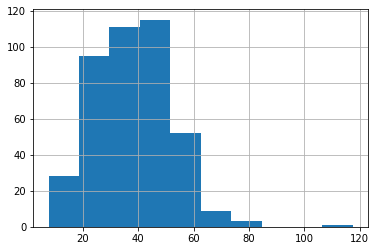

In [53]:
data['House Price Unit'].hist()

In [54]:
data = data[ data['House Price Unit']<90 ]

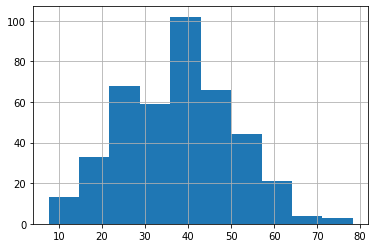

In [55]:
import matplotlib.pyplot as plt

data['House Price Unit'].hist()
plt.show()

#### Select variables

In [56]:
X = data.drop('House Price Unit',axis=1)
y = data['House Price Unit']

#### Split train and test

In [57]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)

In [58]:
X_train.shape, X_test.shape

((309, 8), (104, 8))

### Regression Model

In [59]:
model = XGBRegressor()

In [60]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

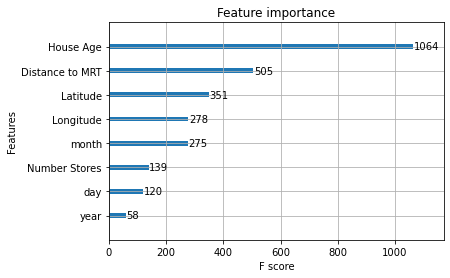

In [61]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()

### Train performance

In [62]:
pred_train = model.predict(X_train)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE

print(r2_score(y_train, pred_train))

0.9967961938754121


In [64]:
print(mean_squared_error(y_train, pred_train)) 

0.5431973293943203


### Test performance

In [65]:
predictions = model.predict(X_test)

In [66]:
print(r2_score(y_test, predictions))

0.7417751061473832


In [67]:
model.score(X_test, y_test)  # R^2

0.7417751061473832

In [68]:
print(mean_squared_error(y_test, predictions))

44.02845575253768


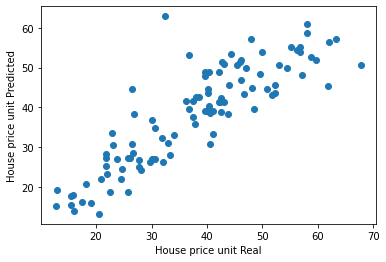

In [69]:
plt.scatter(y_test, predictions)
plt.xlabel("House price unit Real")
plt.ylabel("House price unit Predicted")
plt.show()

# Part 3

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [71]:
data.head()

,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,year,month,day
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6,30
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9,30


In [72]:
data.shape

(413, 9)

### Correlation

In [73]:
data.corr()

,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,year,month,day
House Age,1.000000,0.024676,0.048131,0.055119,-0.048822,-0.210985,0.050193,-0.065570,0.026322
Distance to MRT,0.024676,1.000000,-0.605328,-0.590805,-0.807079,-0.694009,0.017593,0.039912,-0.055431
Number Stores,0.048131,-0.605328,1.000000,0.445994,0.449239,0.612635,-0.003909,0.021271,-0.030288
Latitude,0.055119,-0.590805,0.445994,1.000000,0.413249,0.563954,0.007404,0.017766,0.029698
Longitude,-0.048822,-0.807079,0.449239,0.413249,1.000000,0.549250,0.013488,-0.066000,0.034311
House Price Unit,-0.210985,-0.694009,0.612635,0.563954,0.549250,1.000000,0.075405,-0.047523,0.052549
year,0.050193,0.017593,-0.003909,0.007404,0.013488,0.075405,1.000000,-0.810458,0.091546
month,-0.065570,0.039912,0.021271,0.017766,-0.066000,-0.047523,-0.810458,1.000000,-0.236143
day,0.026322,-0.055431,-0.030288,0.029698,0.034311,0.052549,0.091546,-0.236143,1.000000


* --> Longitude and distance to MRT,
* --> Year and month  have strong correlation:  possible multicollinearity
* --> day is not significant and has low or null correlation with House Price

In [74]:
pd.crosstab(data['year'], columns='count')

col_0,count
year,
2012,126
2013,287


In [75]:
data.groupby('year')['House Price Unit'].mean()

year
2012    36.304762
2013    38.438676
Name: House Price Unit, dtype: float64

In [76]:
data.groupby('month')['House Price Unit'].mean()

month
0     36.922973
2     38.304000
3     40.153333
5     38.453448
6     38.607143
8     38.543333
9     35.636207
11    35.557895
Name: House Price Unit, dtype: float64

### Variable selection with linear regression

In [77]:
X = data.drop('House Price Unit',axis=1)
y = data['House Price Unit']

In [78]:
import statsmodels.api as sm

X_constant= sm.add_constant(X)

lin_reg = sm.OLS(y,X_constant).fit()

lin_reg.summary()

C:\Users\raulv\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       House Price Unit   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     85.36
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           5.37e-82
Time:                        23:48:38   Log-Likelihood:                -1441.9
No. Observations:                 413   AIC:                             2902.
Df Residuals:                     404   BIC:                             2938.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.603e+04   6270.120     -2.556      0.011   -2.84e+04   -3699.960
House Age          -0.2640      0.035     -7.528      0.000      -0.333      -0.195
Distance to MRT    -0.0038      0.001     -5.833      0.000      -0.005      -0.003
Number Stores       1.3095      0.172      7.599      0.000       0.971       1.648
Latitude          225.0145     40.538      5.551      0.000     145.323     304.706
Longitude          15.9548     44.223      0.361      0.718     -70.982     102.892
year                4.2272      1.507      2.806      0.005       1.265       7.189
month               0.2815      0.206      1.366      0.173      -0.124       0.687
day                 0.0427      0.031      1.383      0.167      -0.018       0.103
==============================================================================
Omnibus:                       60.884   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.239
Skew:                           0.718   Prob(JB):                     2.64e-35
Kurtosis:                       5.682   Cond. No.                     3.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

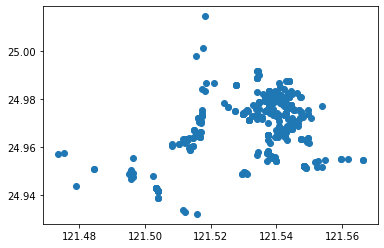

In [79]:
plt.plot(data.Longitude, data.Latitude, 'o')

### Variable selection with Recursive Feature Elimination

In [80]:
from sklearn.feature_selection import RFECV

model = XGBRegressor()

selector= RFECV( model, step=1, min_features_to_select=3, cv=4 ,  verbose=0) ## cv cross validation

selector.fit(X,y)
print(X.columns)

Index(['House Age', 'Distance to MRT', 'Number Stores', 'Latitude',
       'Longitude', 'year', 'month', 'day'],
      dtype='object')


In [81]:
print( selector.ranking_)  # [ 1   2  1  2  1   3  3  1]

[1 1 1 1 1 1 2 1]


In [82]:
print( selector.grid_scores_.mean())   # mean of R^2 for CV in 4

0.69811384397395


In [84]:
print(selector.cv)

4


#### Drop variables

In [85]:
data= data.drop(['Longitude','day','year'], axis=1)  ## month has greater feature importance than year!

In [86]:
data.shape

(413, 6)

#### Split train and test

In [87]:
X = data.drop('House Price Unit',axis=1)
y = data['House Price Unit']

In [88]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)

In [89]:
from xgboost import XGBRegressor

model = XGBRegressor(gpu_id=0)  ## gpu_id=-1 if not gpu

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Model Performance

In [90]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE

pred_train = model.predict(X_train)

print("R^2 train: ", r2_score(y_train, pred_train))  ## model.score

print("MSE train ", mean_squared_error(y_train, pred_train) ) 

R^2 train:  0.9959861380627143
MSE train  0.6805402699489209


In [91]:
pred_test = model.predict(X_test)

print("R^2 test: ", model.score(X_test, y_test) ) ## R^2

print("MSE test ", mean_squared_error(y_test, pred_test) )

# drop month and not year
# R^2 test:  0.7380355195257317
# MSE test  44.66607136599646

R^2 test:  0.7560528237880049
MSE test  41.59404344623954


* First episode:   
    R^2 train: 0.9915
    R^2 test: 0.369

    MSE train: 1.57
    MSE test: 111.38
    

* Second episode:       
    
    R^2 train: 0.9968
    R^2 test: 0.7417

    MSE train: 0.543
    MSE test:44.02

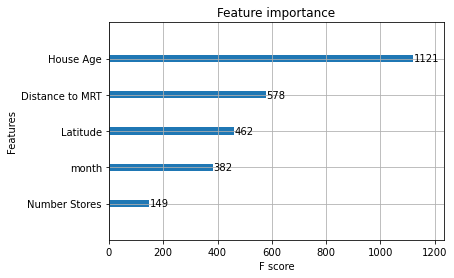

In [92]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()

### Cross validation

In [93]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5).mean()  ## Ya ejecutado en RFECV pero con mas variables (mean: 0.69)

scores

0.688074912964671

### XGB tree visualization

In [ ]:
# pip install graphviz
# conda install python-graphviz
#import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

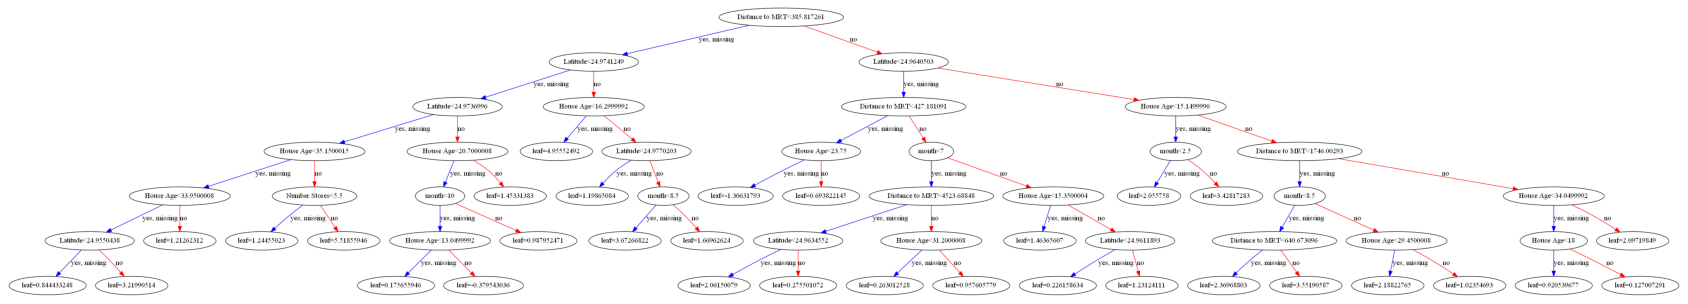

In [94]:
#from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(30, 30))

xgb.plot_tree(model, num_trees=4, ax=ax)

plt.show()

# plt.savefig("temp.pdf") # in case you want to save it

# Part 4

## Hyper Parameter tunning

https://xgboost.readthedocs.io/en/latest/parameter.html

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split

data.head()

,House Age,Distance to MRT,Number Stores,Latitude,House Price Unit,month
0,32.0,84.87882,10,24.98298,37.9,11
1,19.5,306.59470,9,24.98034,42.2,11
2,13.3,561.98450,5,24.98746,47.3,6
3,13.3,561.98450,5,24.98746,54.8,6
4,5.0,390.56840,5,24.97937,43.1,9


### Split train and test

In [96]:
X = data.drop('House Price Unit',axis=1)
y = data['House Price Unit']

In [97]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)

### Hyperparameter tunning

In [98]:
from xgboost import XGBRegressor

model = XGBRegressor()

In [99]:
model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

* gamma [default=0]
A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
* subsamples [default=1] Denotes the fraction of observations to be randomly samples for each tree. Typical values: 0.5-1
* min_child_weight [default=1] Defines the minimum sum of weights of all observations required in a child.

In [100]:
from sklearn.model_selection import GridSearchCV

xgbr = XGBRegressor(gpu_id=0,learning_rate=0.3, max_depth=6, n_estimators=100,subsample=0.8)  # gpu_id=-1

# Set the parameters by cross-validation


tuned_parameters = {
   'max_depth':[3,4,5,6],
   'min_child_weight':[1,2,3,4,5,6],
   'gamma':[i/10.0 for i in range(0,5)], 
   'learning_rate':[0.01,0.05,0.1,0.2]  #, 'n_estimators':[100, 500,1000]
}

clf = GridSearchCV(xgbr, param_grid = tuned_parameters,cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print( clf.best_params_)
print("Best score found on development set:")
print( clf.best_score_)

# clf.grid_scores_

Best parameters set found on development set:
{'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3}
Best score found on development set:
0.7362571863487891


In [101]:
xgbr.objective

'reg:squarederror'

### Fitting model with parameters

In [102]:
model= XGBRegressor(gpu_id=0,learning_rate=0.05, gamma=0.3,max_depth=3, n_estimators=100,subsample=0.8, min_child_weight=3) #gamma 0.3 child 3 

In [103]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

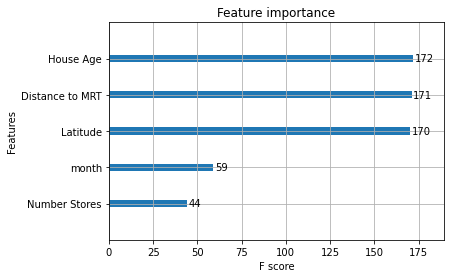

In [104]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()

In [105]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE

pred_train = model.predict(X_train)

print("R^2 train: ", r2_score(y_train, pred_train))  ## model.score

print("MSE train ", mean_squared_error(y_train, pred_train) ) 

R^2 train:  0.8811218657442723
MSE train  20.15549085679953


In [106]:
pred_test = model.predict(X_test)

print("R^2 test: ", model.score(X_test, y_test) ) ## R^2

print("MSE test ", mean_squared_error(y_test, pred_test) )

R^2 test:  0.7905039995532901
MSE test  35.71996970697218


* First episode:   
    R^2 train: 0.9915
    R^2 test: 0.369

    MSE train: 1.57
    MSE test: 111.38
    

* Second episode:       
    
    R^2 train: 0.9968
    R^2 test: 0.7417

    MSE train: 0.543
    MSE test:44.02

*  Third episode:

    R^2 train: 0.9959
    R^2 test: 0.75605

    MSE train: 0.6805
    MSE test: 41.59


### EXTRA...

    Grid searcv all variables
Best score found on development set:
0.7407440355802324  (0.739)

    All variables after grid search:
R^2 test:  0.7925611270283607
MSE test  35.36922061898854